# Explore here

In [4]:
# Your code here
import os
import shutil
import random
Lista_fotografias=os.listdir('../data/raw/train')

for fotografia in Lista_fotografias:
    if fotografia.endswith('.jpeg'):
        continue
    if 'cat' in fotografia:
        #2 de cada 10 veces mover el archivo a processed/test/cat y 8 de cada 10 veces a processed/train/cat 
        if random.random() < 0.2:
            destino = '../data/processed/test/cat'
        else:
            destino = '../data/processed/train/cat'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)    
    elif 'dog' in fotografia:
        if random.random() < 0.2:
            destino = '../data/processed/test/dog'
        else:
            destino = '../data/processed/train/dog'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    else:
        print(f'Animal desconocido: {fotografia}')


In [7]:
#cambiar de tamaño las imagenes para que todas sean de 200x200
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

def resize_image(directory, size=(200,200)):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)
            save_img(img_path, img_array)

resize_image('../data/processed/train/cat')
resize_image('../data/processed/train/dog')
resize_image('../data/processed/test/cat')
resize_image('../data/processed/test/dog')


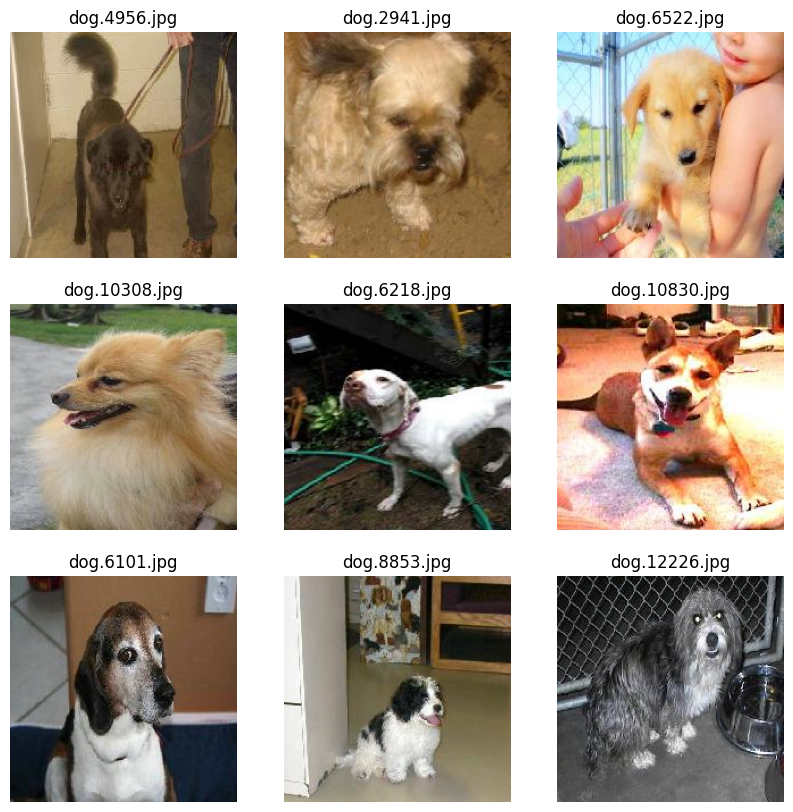

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/dog'))
    img = load_img(os.path.join('../data/processed/train/dog', img_path))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(img_path.split("/")[-1])
    plt.axis('off')

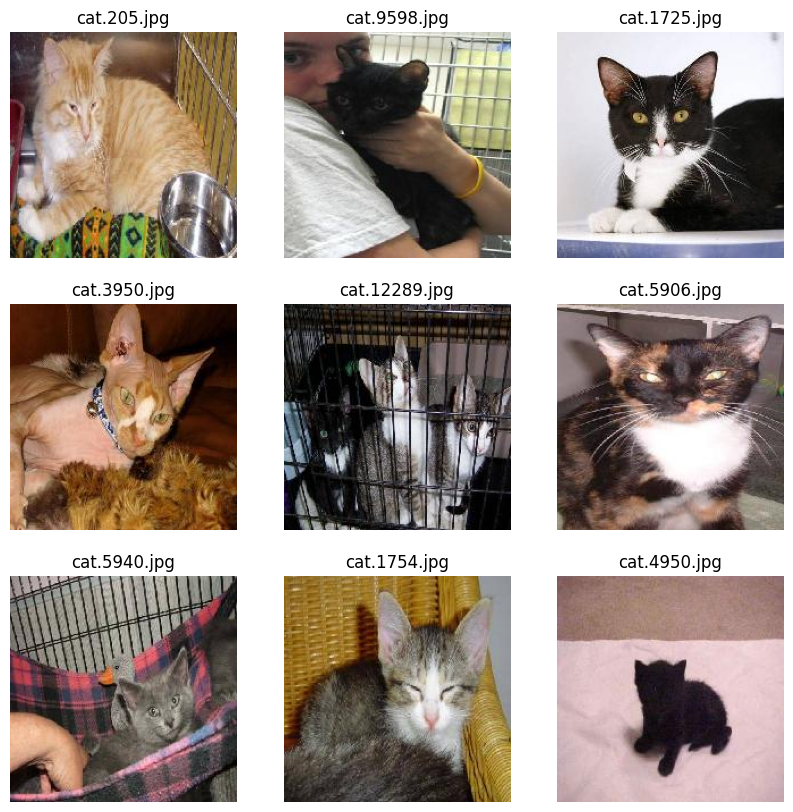

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/cat'))
    img = load_img(os.path.join('../data/processed/train/cat', img_path))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(img_path.split("/")[-1])
    plt.axis('off')

In [16]:
#mover los archivos de la carpeta de test a las subcarpetas dog y cat a la carpeta test

for subdir in ['cat', 'dog']:
   subdir_path = os.path.join('../data/processed/test', subdir)
   for filename in os.listdir(subdir_path):
       if filename.endswith('.jpg'):
           src_path = os.path.join(subdir_path, filename)
           dest_path = os.path.join('../data/processed/test',filename)
           shutil.move(src_path, dest_path)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/processed/train'
test_dir = '../data/processed/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir, 
                                              target_size=(200, 200), 
                                              batch_size=32, 
                                              classes=['cat', 'dog']
)
test_data = datagentest.flow_from_directory(test_dir, 
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test']
)


Found 19935 images belonging to 2 classes.
Found 5065 images belonging to 1 classes.
Found 5065 images belonging to 1 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling
model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))


c:\Users\GrhgG\anaconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\GrhgG\anaconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = categorical_crossentropy,
              metrics = ['accuracy'])

In [24]:
model.fit(train_data,
           epochs = 1)

c:\Users\GrhgG\anaconda3\envs\deep-learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 14/623 ━━━━━━━━━━━━━━━━━━━━ 1:34:11 9s/step - accuracy: 0.5116 - loss: 0.6953

KeyboardInterrupt: 

In [29]:
# Hacer predicciones con el modelo 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_image(model, img_path):
    img = load_img(img_path, target_size=(200, 200))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    return predictions

import random
import os
import shutil
# Example usage
img_path = random.choice(os.listdir('../data/processed/test'))
predictions = predict_image(model, os.path.join('../data/processed/test', img_path))
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class for {img_path}: {predicted_class}')
# Save the model
model.save('../models/cat_dog_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Predicted class for dog.8953.jpg: [0]
